<a href="https://colab.research.google.com/github/LeoVal1/Digit_Classification/blob/main/Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from keras import layers
import tensorflow_datasets as tfds
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.optimizers import Adam



#LOAD MNIST DATASET

11501568/11490434 [==============================] - 0s 0us/step


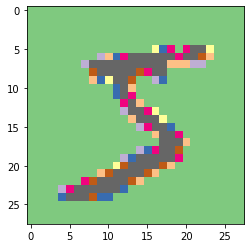

In [2]:
mnist = tf.keras.datasets.mnist
mnist_df =  mnist.load_data()
(x_train, y_train),(x_test, y_test) = mnist_df  # Load data
plt.imshow(x_train[0], cmap="Accent")
plt.show()






##PREPROCESS THE DATA INTO NUMPY ARRAYS

In [3]:
x_train_expand = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test_expand = x_test.reshape((x_test.shape[0], 28, 28, 1))

x_train_expand = x_train_expand.astype('float16')
x_test_expand = x_test_expand.astype('float16')

print(x_train_expand.shape)
print(x_test_expand.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
# normalize inputs from 0-255 to 0-1
x_train_norm = x_train_expand / 255
x_test_norm = x_test_expand / 255
x_train_expand = x_train_expand.reshape(-1, 28, 28, 1)
x_test_expand = x_test_expand.reshape(-1, 28, 28, 1)
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(x_train_expand.shape, x_test_expand.shape)
print(y_train.shape)
num_classes = y_test.shape[1]

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000, 10)


In [5]:
print(num_classes)

10


##BUILD A MODEL

In [6]:
model = Sequential(
    [
layers.Conv2D(filters=8,kernel_size=(5,5),strides=1,padding='same',activation='relu',input_shape=(28,28,1)),
layers.MaxPooling2D(2),
layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding='same',activation='relu',input_shape=(14,14,8)),
layers.Flatten(),
layers.Dense(32, activation='relu'),
layers.Dense(num_classes, activation='softmax'),
  ])

In [7]:
model.summary(),
model.reset_states(),
model.reset_metrics(),

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 32)                100384    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

(None,)

In [8]:
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics=['accuracy'])

##Without Normalization

In [9]:
history = model.fit(x = x_train_expand, y=y_train, epochs= 10 ,validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 32s 24ms/step - loss: 0.8212 - accuracy: 0.7515 - val_loss: 0.1747 - val_accuracy: 0.9501
Epoch 2/10
1257/1257 [==============================] - 29s 23ms/step - loss: 0.1215 - accuracy: 0.9651 - val_loss: 0.1194 - val_accuracy: 0.9649
Epoch 3/10
1257/1257 [==============================] - 30s 24ms/step - loss: 0.0767 - accuracy: 0.9766 - val_loss: 0.1173 - val_accuracy: 0.9671
Epoch 4/10
1257/1257 [==============================] - 30s 24ms/step - loss: 0.0545 - accuracy: 0.9831 - val_loss: 0.0949 - val_accuracy: 0.9737
Epoch 5/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0440 - accuracy: 0.9859 - val_loss: 0.0944 - val_accuracy: 0.9749
Epoch 6/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.1039 - val_accuracy: 0.9759
Epoch 7/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.1016 -

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Traning Accuracy')
print(acc)
print('Validation Accuracy')
print(val_acc)
print('Training loss')
print(loss)
print('Validation loss')
print(val_loss)

Traning Accuracy
[0.7514863610267639, 0.9650986194610596, 0.9765665531158447, 0.9830841422080994, 0.9858951568603516, 0.9882335662841797, 0.9894773364067078, 0.9902734160423279, 0.9908455610275269, 0.9929848909378052]
Validation Accuracy
[0.9500530362129211, 0.96490079164505, 0.9670723676681519, 0.9736881852149963, 0.9749002456665039, 0.9758598208427429, 0.9757083058357239, 0.9747992753982544, 0.9783344268798828, 0.9782333970069885]
Training loss
[0.8212416768074036, 0.12148023396730423, 0.07668540626764297, 0.05446462705731392, 0.043997325003147125, 0.03738056868314743, 0.033210866153240204, 0.02825774811208248, 0.02959158830344677, 0.023543311282992363]
Validation loss
[0.174735888838768, 0.11942752450704575, 0.1172880083322525, 0.09487975388765335, 0.09441342949867249, 0.10391134768724442, 0.10163844376802444, 0.13007493317127228, 0.09622106701135635, 0.10439643263816833]


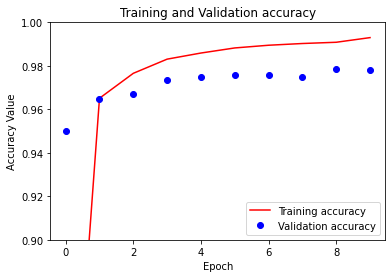

In [11]:
epochs = range(10)
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.ylim([0.9, 1])
plt.legend()
plt.show()

In [12]:
loss = history.history['loss']
print(acc)
val_loss = history.history['val_loss']
print(val_loss)

[0.7514863610267639, 0.9650986194610596, 0.9765665531158447, 0.9830841422080994, 0.9858951568603516, 0.9882335662841797, 0.9894773364067078, 0.9902734160423279, 0.9908455610275269, 0.9929848909378052]
[0.174735888838768, 0.11942752450704575, 0.1172880083322525, 0.09487975388765335, 0.09441342949867249, 0.10391134768724442, 0.10163844376802444, 0.13007493317127228, 0.09622106701135635, 0.10439643263816833]


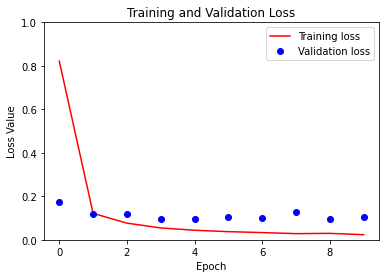

In [13]:
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 0.0930 - accuracy: 0.9797

Test accuracy: 0.9797000288963318

Test loss 0.0929744765162468


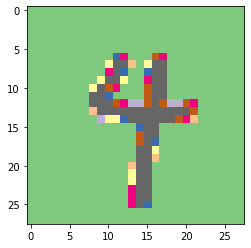

4


In [15]:
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="Accent")
plt.show()
print(np.argmax(predictions[565])) # Print out the number

##With Normalization

In [16]:
history1 = model.fit(x = x_train_norm, y=y_train, epochs= 10 ,validation_split=0.33)

Epoch 1/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.2906 - accuracy: 0.9191 - val_loss: 0.1039 - val_accuracy: 0.9680
Epoch 2/10
1257/1257 [==============================] - 30s 24ms/step - loss: 0.0805 - accuracy: 0.9747 - val_loss: 0.0724 - val_accuracy: 0.9776
Epoch 3/10
1257/1257 [==============================] - 30s 24ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0601 - val_accuracy: 0.9815
Epoch 4/10
1257/1257 [==============================] - 31s 24ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0564 - val_accuracy: 0.9824
Epoch 5/10
1257/1257 [==============================] - 31s 24ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0546 - val_accuracy: 0.9838
Epoch 6/10
1257/1257 [==============================] - 31s 24ms/step - loss: 0.0248 - accuracy: 0.9916 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 7/10
1257/1257 [==============================] - 31s 25ms/step - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0470 -

In [17]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
print(acc)
print(val_acc)
print(loss)
print(val_loss)

[0.9190775752067566, 0.9747008681297302, 0.9831587672233582, 0.9878355264663696, 0.9903480410575867, 0.9916167259216309, 0.9937809109687805, 0.995572030544281, 0.9960695505142212, 0.9975124001502991]
[0.9679813981056213, 0.9775769114494324, 0.9814655780792236, 0.9824251532554626, 0.9837886691093445, 0.9833846688270569, 0.9869703650474548, 0.9843947291374207, 0.985657274723053, 0.9864148497581482]
[0.2905930280685425, 0.08047281950712204, 0.054462142288684845, 0.040257107466459274, 0.030948836356401443, 0.024776598438620567, 0.01996646076440811, 0.014684043824672699, 0.012072797864675522, 0.008856268599629402]
[0.10386267304420471, 0.07241340726613998, 0.06014538183808327, 0.05642043426632881, 0.05463423579931259, 0.053657807409763336, 0.047013331204652786, 0.06065256521105766, 0.056333065032958984, 0.05425802990794182]


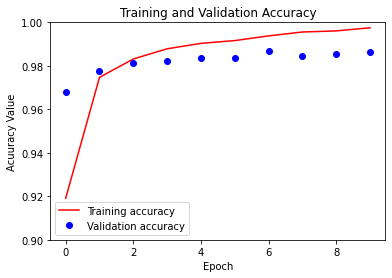

In [18]:
epochs = range(10)
plt.figure()
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'bo', label='Validation accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acuuracy Value')
plt.ylim([0.9, 1])
plt.legend()
plt.show()

In [23]:
loss = history.history['loss']
print(acc)
val_loss = history.history['val_loss']
print(val_loss)

[0.9190775752067566, 0.9747008681297302, 0.9831587672233582, 0.9878355264663696, 0.9903480410575867, 0.9916167259216309, 0.9937809109687805, 0.995572030544281, 0.9960695505142212, 0.9975124001502991]
[0.174735888838768, 0.11942752450704575, 0.1172880083322525, 0.09487975388765335, 0.09441342949867249, 0.10391134768724442, 0.10163844376802444, 0.13007493317127228, 0.09622106701135635, 0.10439643263816833]


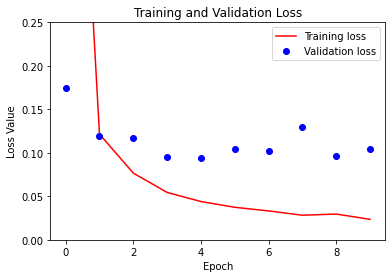

In [21]:
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 0.25])
plt.legend()
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(x=x_test_expand, y=y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss', test_loss)

313/313 [==============================] - 3s 9ms/step - loss: 9.3832 - accuracy: 0.9853

Test accuracy: 0.9853000044822693

Test loss 9.383208274841309


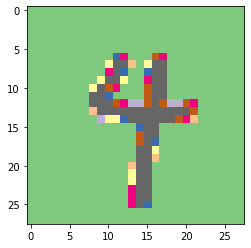

4


In [24]:
predictions = model.predict([x_test_expand]) # Make prediction
plt.imshow(x_test[565], cmap="Accent")
plt.show()
print(np.argmax(predictions[565])) # Print out the number